In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

 
# make sure the import the magic function that randers the figure in the notebook
%matplotlib inline

In [2]:
# import the data set. please see read me for more information about data set.

train_data = pd.read_csv("/Users/zaferozcan/Desktop/porto-seguro-safe-driver-prediction/train.csv")

                                 Getting basic information on data    

In [3]:
# glance at first 3 row of data
train_data.head(3)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0


In [4]:
# get the detailed information on data and data types of the data set
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [5]:
print(len(train_data["id"]))
print(len(train_data.columns))
print(train_data.shape)

595212
59
(595212, 59)


In [6]:
# create data frame in order for better data manipulation and visualization
df = pd.DataFrame(data = train_data)

In [7]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


                                     Checking for missing values

In [8]:
# if you check the dataset the missing values are indicated as -1 for example:
print(df["ps_car_07_cat"].value_counts())

 1    553148
 0     30575
-1     11489
Name: ps_car_07_cat, dtype: int64


In [9]:
missingCols = []
missingCount = []
for col in df.columns:
    value_counts = df[df[col] == -1][col].count()
    
    if value_counts > 0:
        missingCols.append(col)
        missingCount.append(value_counts)
        
missingDataInfo = pd.DataFrame(missingCols, columns=["variable_name"])
missingDataInfo["missing_value_counts"] = missingCount

In [10]:
missingDataInfo

,variable_name,missing_value_counts
0,ps_ind_02_cat,216
1,ps_ind_04_cat,83
2,ps_ind_05_cat,5809
3,ps_reg_03,107772
4,ps_car_01_cat,107
5,ps_car_02_cat,5
6,ps_car_03_cat,411231
7,ps_car_05_cat,266551
8,ps_car_07_cat,11489
9,ps_car_09_cat,569


In [11]:
# Theoretically, 20-30% of missing data is fine; however, beyond this we should consider dropping the variable.
print("Max traeshold number of the missing value is {}".format(df.shape[0] * 0.3))

Max traeshold number of the missing value is 178563.6


In [12]:
# check the variable that we can consider to drop
drop_variable = missingDataInfo[missingDataInfo["missing_value_counts"] > df.shape[0] * 0.3]
drop_variable
 

,variable_name,missing_value_counts
6,ps_car_03_cat,411231
7,ps_car_05_cat,266551


In [13]:
for cols in df.columns:
    if cols in missingDataInfo.columns:
        if missingDataInfo["missing_value_counts"] > df.shape[0] * 0.3:
            df.drop(labels = [cols], axis =1, inplace =True)

In [14]:
## check if variables was dropped

for var in drop_variable.columns:
    if var not in df.columns:
        print(" has been successfully dropped")
    else:
        print("has not dropped")
        

 has been successfully dropped
 has been successfully dropped


                                        taking care of the missing values

In [15]:
# before anything, check the data types 
for i in missingDataInfo["variable_name"]:
    print(i + "    ",train_data[i].dtype)

ps_ind_02_cat     int64
ps_ind_04_cat     int64
ps_ind_05_cat     int64
ps_reg_03     float64
ps_car_01_cat     int64
ps_car_02_cat     int64
ps_car_03_cat     int64
ps_car_05_cat     int64
ps_car_07_cat     int64
ps_car_09_cat     int64
ps_car_11     int64
ps_car_12     float64
ps_car_14     float64


target
0    573518
1     21694
Name: target, dtype: int64

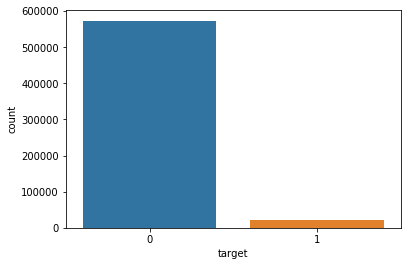

In [16]:
#Count of target variable.

sns.countplot(df.target)
df.groupby('target')['target'].count()

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features.

In [17]:
df.columns


Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [18]:
# lets group the features and check correlation between them
ind_cols = pd.DataFrame()
reg_cols = pd.DataFrame()
car_cols = pd.DataFrame()
calc_cols = pd.DataFrame()

for col in df.columns[2:]:
    col_feat = col.split("_")[1]
    if col_feat == "ind":
        ind_cols[col] = df[col]
    elif col_feat == "reg":
        reg_cols[col] = df[col]
    elif col_feat == "car":
        car_cols[col] = df[col]
    else:
        calc_cols[col] = df[col]

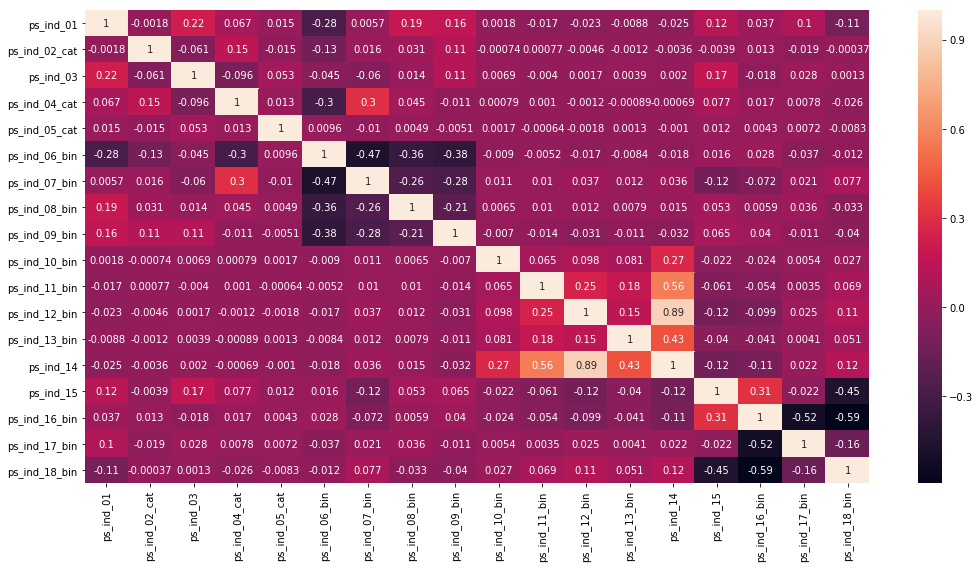

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(ind_cols.corr(), annot=True)
plt.tight_layout()

In [20]:
# now it's time to impute values for the missing values
# but before we should mark the missing values for imputation 

df = df.replace(-1, np.NaN)

In [21]:
mis_val = pd.DataFrame()
for c in df.columns:
    if df[c].isna().sum() > 0:
        print(c, df[c].isna().sum())
        mis_val[c] = df[c]

    
        

ps_ind_02_cat 216
ps_ind_04_cat 83
ps_ind_05_cat 5809
ps_reg_03 107772
ps_car_01_cat 107
ps_car_02_cat 5
ps_car_03_cat 411231
ps_car_05_cat 266551
ps_car_07_cat 11489
ps_car_09_cat 569
ps_car_11 5
ps_car_12 1
ps_car_14 42620


In [22]:
# now we can start the imputing proceess
# start doing imputation with non categorical features
# to do that sklearn has strong tool is under "preprocessing" family

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)

# non cat values imputation
for c in mis_val.columns:
    if "cat" not in c.split("_"):
        df[c] = imputer.fit_transform(df[[c]])
        
        
    


In [23]:
# imputation to categorical values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0, verbose=0, copy=True)
for c in mis_val.columns:
    if "cat" in c.split("_"):
        df[c] = imputer.fit_transform(df[[c]])

In [24]:
# finally checking if all the missing values are filled
df.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [25]:
# creating dummy variables for categorical values. 
#but before that lets check number of categories for each feature 



In [26]:
for c in df.columns:
    if "cat" in c.split("_"):
        print(c , "  ", len(df[c].value_counts()))


ps_ind_02_cat    4
ps_ind_04_cat    2
ps_ind_05_cat    7
ps_car_01_cat    12
ps_car_02_cat    2
ps_car_03_cat    2
ps_car_04_cat    10
ps_car_05_cat    2
ps_car_06_cat    18
ps_car_07_cat    2
ps_car_08_cat    2
ps_car_09_cat    5
ps_car_10_cat    3
ps_car_11_cat    104


Some colums has many categories which means if we create dummy for all of those there will be adeed many new demantions. So, I would like to check correlation matrix between those columns with categorical variables then we can remove if they have strong correlations

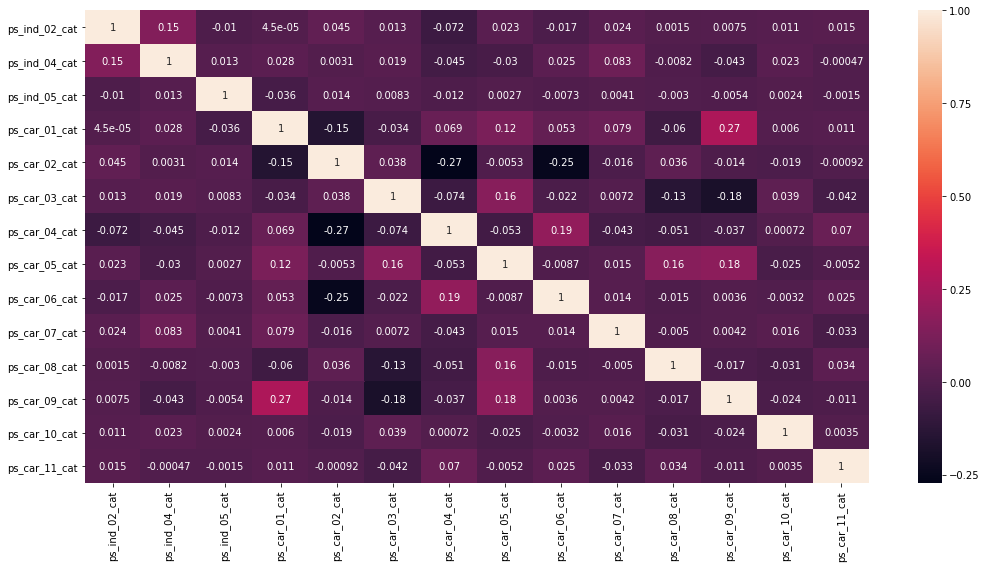

In [27]:
variables_with_cats = pd.DataFrame()
for c in df.columns:
    if "cat" in c.split("_"):
        variables_with_cats[c] = df[c]
        
plt.figure(figsize=(15,8))
sns.heatmap(variables_with_cats.corr(), annot=True)
plt.tight_layout()        

In [28]:
#  there is not a strong correlation between columns so I decided to keep them 
# but not the "ps_car_11_cat" since it has 101 categories.

df_dummied = pd.get_dummies(data = df, columns=['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat'], drop_first=True )

print(df.shape)
print(df_dummied.shape)

# dimention has changed to (595212, 102)

(595212, 59)
(595212, 104)


In [29]:
column_excluding_calc  = [w for w in df_dummied.columns if "calc" in w]

In [30]:
column_excluding_calc

['ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

## Applying Some Dimention Reduction Techniques

1---
checking the varience

Varience is a paramouth importance for improvig model. Since a variable with low varience will not affect the target variable, It does not improve the model. For example, think a variable in a data set all observations have the same value, for instance, zero. This wont help the model.

In [31]:
count = 0
low_varience_cols =[]
for c in df_dummied.drop(labels=["id","target"], axis=1):
    if df_dummied[c].var() <1.8:
        count = count + 1
        low_varience_cols.append(c)
        
    
    

In [32]:
# drop low varience columns
df_dummied.drop(labels = low_varience_cols, axis=1, inplace=True)

2---Random Forest 


Scikit-learn's Random Forest classifier comes with a great feature called feature_importances_ --helps to select a smaller subset of important features of model

In [33]:
from sklearn.ensemble import RandomForestRegressor
df_dummied_X=df_dummied.drop(['id', 'target'], axis=1)
df_dummied_y = df_dummied["target"]
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df_dummied_X, df_dummied_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

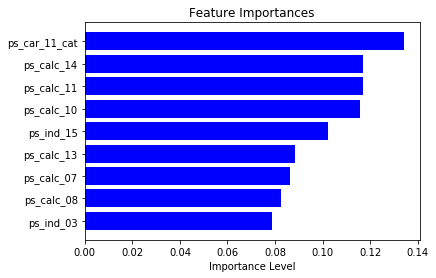

In [34]:
features = df_dummied_X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance Level')
plt.show()

## Fitting the data

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#Splitting
X_train, X_test, y_train, y_test = train_test_split(df_dummied_X,
                                                    df_dummied_y.astype(int), test_size=0.25, random_state=7)

In [36]:
# we have to deal with imbalanced classification problems, which is a problem that involves predicting a class label 
# where the distribution labels in the data skewed.


In [39]:
df_train_temp = X_train
df_train_temp['target'] = y_train


df_minority = df_train_temp[df_train_temp.target==1]
df_minority.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(16269, 11)

In [51]:
#upsampling
from sklearn.utils import resample
df_majority = df_undersampled[df_undersampled.target==0]
df_minority = df_undersampled[df_undersampled.target==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_minority.shape[0]*2,    # to match majority class 100% of majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
#class counts
df_upsampled.target.value_counts()

0    130152
1     32538
Name: target, dtype: int64

In [52]:
X_train_res = df_upsampled.drop('target', axis = 1)
y_train_res = df_upsampled.target

## Feature Scaling 

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)


## Prediction

In [60]:
#Random Forest
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=25, class_weight="balanced")
clf_RF.fit(X_train_res,y_train_res)
predictions_RF = clf_RF.predict(X_test)
print(classification_report(y_test,predictions_RF))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98    143378
          1       0.05      0.00      0.01      5425

avg / total       0.93      0.96      0.94    148803

